In [23]:
import nltk as nl
from nltk import word_tokenize,sent_tokenize
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show, figure
import numpy as np
%matplotlib inline

In [2]:
nl.download('punkt')

[nltk_data] Downloading package punkt to /home/vinayak/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Loading Data

In [5]:
nl.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     /home/vinayak/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [6]:
from nltk.corpus import gutenberg as gut

In [7]:
gut.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

## Tokenizer

In [8]:
g_sent = sent_tokenize(gut.raw())

In [9]:
len(g_sent)

94428

In [10]:
g_sen = gut.sents()

In [11]:
g_sen[0:10]

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'],
 ['VOLUME', 'I'],
 ['CHAPTER', 'I'],
 ['Emma',
  'Woodhouse',
  ',',
  'handsome',
  ',',
  'clever',
  ',',
  'and',
  'rich',
  ',',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  ',',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  ';',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  '-',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her',
  '.'],
 ['She',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  ',',
  'indulgent',
  'father',
  ';',
  'and',
  'had',
  ',',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  "'",
  's',
  'marriage',
  ',',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period',
  '.'],
 ['Her',
  'mother',
  'h

In [12]:
model = Word2Vec(sentences = g_sen, size = 64, sg = 1, window = 10, min_count = 10)

In [13]:
model.most_similar('dog')

/home/vinayak/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('puppy', 0.8031221628189087),
 ('chimney', 0.7582523822784424),
 ('mouse', 0.7455339431762695),
 ('thief', 0.7413161993026733),
 ('drunkard', 0.7241536378860474),
 ('cannibal', 0.7220092415809631),
 ('sweeper', 0.717663049697876),
 ('butcher', 0.7096834182739258),
 ('shell', 0.7096133828163147),
 ('cage', 0.7075584530830383)]

In [14]:
model.most_similar('suppose')

/home/vinayak/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('think', 0.8395136594772339),
 ('manage', 0.8320252299308777),
 ('_that_', 0.8317485451698303),
 ('Mamma', 0.8195957541465759),
 ('hesitate', 0.8185728788375854),
 ('anyhow', 0.8156754970550537),
 ('_you_', 0.8125289678573608),
 ('contradict', 0.8064144253730774),
 ('recollect', 0.8036293983459473),
 ('presume', 0.8022750616073608)]

In [15]:
model.most_similar(positive=['father','woman'],negative=['man'])

/home/vinayak/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('sister', 0.809759259223938),
 ('wife', 0.7951454520225525),
 ('mother', 0.7824016809463501),
 ('husband', 0.7782254815101624),
 ('daughter', 0.7774447202682495),
 ('brother', 0.7426751852035522),
 ('Rachel', 0.7293371558189392),
 ('Tamar', 0.7050841450691223),
 ('Sarah', 0.7026817798614502),
 ('youngest', 0.6969712972640991)]

## Reduction of dimentionality (T-SNE)

In [25]:
len(model.wv.vocab)

10878

In [26]:
X = model[model.wv.vocab]

/home/vinayak/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [27]:
np.asarray(X).shape

(10878, 64)

In [28]:
ts = TSNE(n_components= 2, n_iter=500,verbose=True)

In [29]:
X_3d = ts.fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10878 samples in 0.021s...
[t-SNE] Computed neighbors for 10878 samples in 13.700s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10878
[t-SNE] Computed conditional probabilities for sample 2000 / 10878
[t-SNE] Computed conditional probabilities for sample 3000 / 10878
[t-SNE] Computed conditional probabilities for sample 4000 / 10878
[t-SNE] Computed conditional probabilities for sample 5000 / 10878
[t-SNE] Computed conditional probabilities for sample 6000 / 10878
[t-SNE] Computed conditional probabilities for sample 7000 / 10878
[t-SNE] Computed conditional probabilities for sample 8000 / 10878
[t-SNE] Computed conditional probabilities for sample 9000 / 10878
[t-SNE] Computed conditional probabilities for sample 10000 / 10878
[t-SNE] Computed conditional probabilities for sample 10878 / 10878
[t-SNE] Mean sigma: 0.332615
[t-SNE] KL divergence after 250 iterations with early exaggeration: 91.737457
[t-SNE] KL

In [30]:
co_df = pd.DataFrame(X_3d,columns=['X','Y'])
co_df['token'] = model.wv.vocab.keys()

In [31]:
co_df.to_csv('rawgut.csv',index=False)

## Visualize the text

In [32]:
co_df = pd.read_csv('rawgut.csv')

In [33]:
co_df.head(10)

,X,Y,token
0,-29.175303,6.945189,[
1,-3.498316,31.170889,Emma
2,17.356920,12.952902,by
3,-2.235300,31.697538,Jane
4,-29.148610,6.953661,]
5,-17.123590,3.355200,I
6,-29.304161,6.796502,CHAPTER
7,-1.446846,31.757868,Woodhouse
8,17.221405,13.100752,","
9,-7.738234,14.735146,handsome


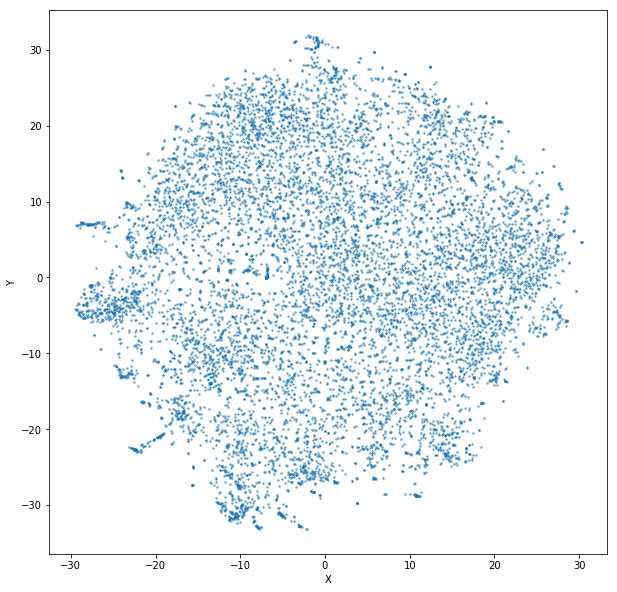

In [34]:
_ = co_df.plot.scatter('X','Y',figsize=(10,10),marker=".",s=10,alpha=0.5)

In [35]:
output_notebook()

Loading BokehJS ...

In [40]:
subset_df = co_df.sample(5000)

In [41]:
p = figure(plot_width = 1000,plot_height = 1000)
_ = p.text(x=subset_df.X,y = subset_df.Y,text=subset_df.token)

In [42]:
show(p)

### StopWords

In [36]:
stwrds = stopwords.words('english') + list(string.punctuation)

In [38]:
print(stwrds)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '